# 6.5 Machine Learning Part 2

This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

### Importing libraries and data and renaming columns

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [89]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [90]:
path = r'C:\Users\JocGa\Achievement 6'

In [91]:
df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Merged_Happiness_Report_2015_2019.csv'))

In [92]:
df_merged.shape

(781, 11)

In [93]:
df_merged.head()

,Unnamed: 0,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451


In [94]:
#drop unname columns for df
df_merged = df_merged.drop(columns = ['Country'])

In [95]:
df_merged = df_merged.rename(columns={'Unnamed: 0': 'No'})

### 2. The elbow technique

In [96]:
#defines the range of potential cluster in the data
num_cl = range(1, 10)

In [97]:
#defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [98]:
#creates a score that represents # a rate of variation for the given cluster option
score = [kmeans[i].fit(df_merged).score(df_merged) for i in range(len(kmeans))]

score

C:\Users\JocGa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-42221463.378295645,
 -11673525.681732468,
 -6025370.863315319,
 -4049748.945136828,
 -3184756.976787201,
 -2598615.8953388007,
 -2126041.4031457095,
 -1675683.068516714,
 -1373015.52745197]

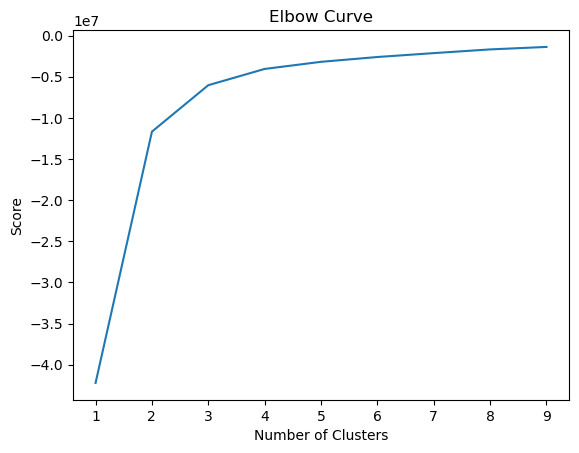

In [99]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [100]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [101]:
# Fit the k-means object to the data.

kmeans.fit(df_merged)

KMeans(n_clusters=3)

In [102]:
df_merged['Clusters'] = kmeans.fit_predict(df_merged)

In [103]:
df_merged.head()

,No,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,Clusters
0,0,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1
1,1,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1
2,2,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,1
3,3,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1
4,4,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,1


In [104]:
df_merged['Clusters'].value_counts()

1    263
0    261
2    257
Name: Clusters, dtype: int64

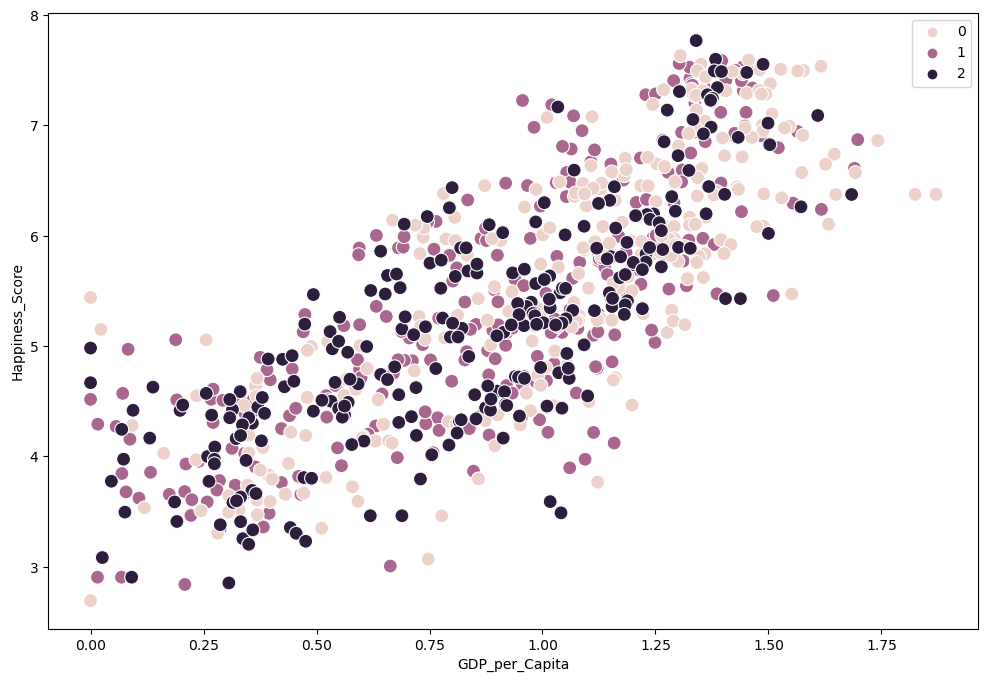

In [105]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['GDP_per_Capita'], y=df_merged['Happiness_Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP_per_Capita') # Label x-axis.
plt.ylabel('Happiness_Score') # Label y-axis.
plt.show()

#observation, while there is no visible cluster formated, we can see that cluster 2 appears more on the highest scale of gdp per catita, which scale high in the happiness score. while from 0-0.25 gdp per capita we see more of cluster of 0 and 1. 

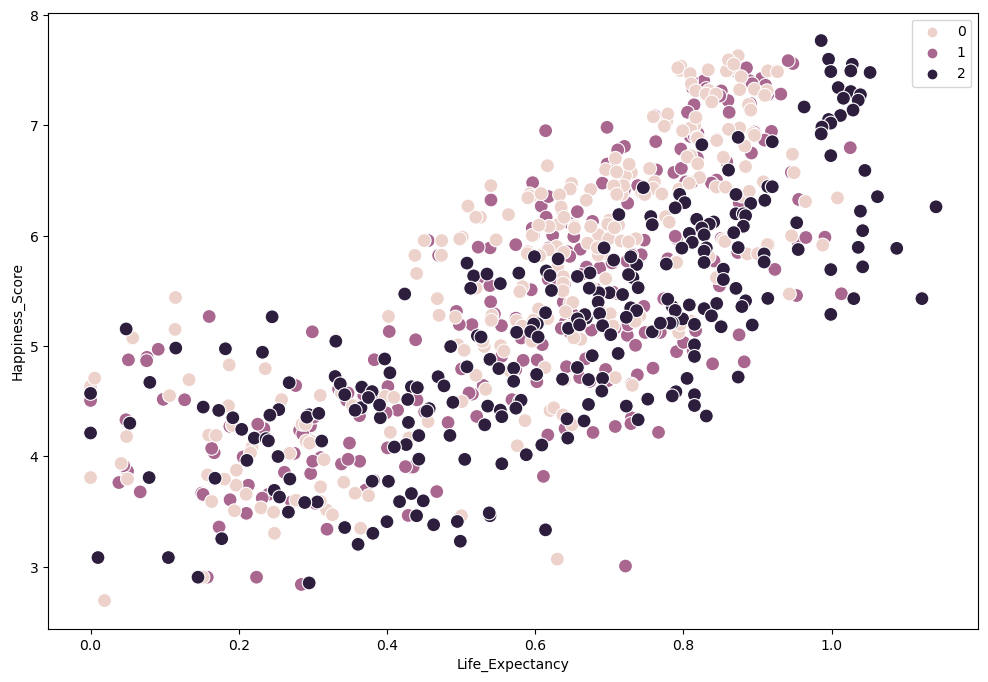

In [106]:
# Plot the clusters for the "Happiness_Score" and "Life_Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['Life_Expectancy'], y=df_merged['Happiness_Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life_Expectancy') # Label x-axis.
plt.ylabel('Happiness_Score') # Label y-axis.
plt.show()

#observation, while ther is no visible cluster formated, dark purple or cluster 2 seems to appear more after 0.6 of life expectancy, and seem to move up on the happiness score. while there are also cluster of 0 after 0.6 which also moves up on the happiness score. 

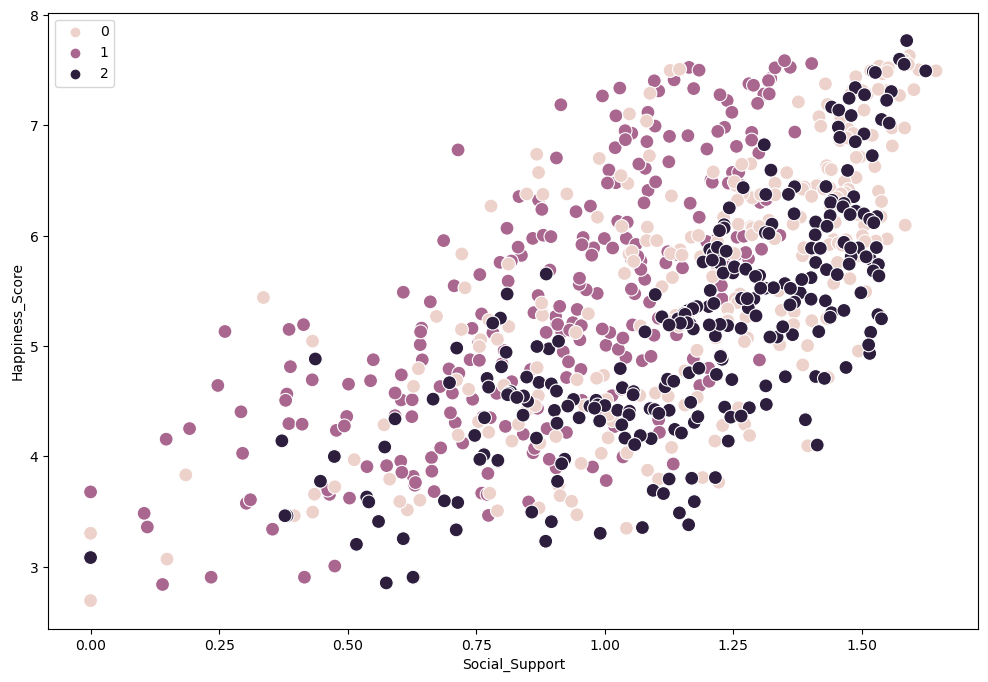

In [107]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged['Social_Support'], y=df_merged['Happiness_Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social_Support') # Label x-axis.
plt.ylabel('Happiness_Score') # Label y-axis.
plt.show()

#observation, all three cluster appear after 0.50 of soical support not much of information given. 

In [108]:
df_merged.loc[df_merged['Clusters'] == 2, 'Cluster'] = 'dark purple'
df_merged.loc[df_merged['Clusters'] == 1, 'Cluster'] = 'purple'
df_merged.loc[df_merged['Clusters'] == 0, 'Cluster'] = 'pink'

In [109]:
df_merged.groupby('Cluster').agg({'Happiness_Score':['mean', 'median'], 
                         'GDP_per_Capita':['mean', 'median'], 
                         'Social_Support':['mean', 'median'],
                          'Life_Expectancy':['mean', 'median']})

Happiness_Score        GDP_per_Capita          Social_Support  \
                       mean median           mean   median           mean   
Cluster                                                                     
dark purple        5.136883  5.161       0.827642  0.87900       1.162716   
pink               5.631046  5.838       1.033225  1.11200       1.173936   
purple             5.360213  5.212       0.881663  0.95104       0.902326   

                      Life_Expectancy            
               median            mean    median  
Cluster                                          
dark purple  1.217000        0.633008  0.667000  
pink         1.239415        0.604110  0.644948  
purple       0.950250        0.600316  0.643680

#observation, Cluster "Dark Purple": This cluster has a relatively high mean happiness score (5.63) and GDP per capita (1.03).This cluster represents countries with a relatively high level of happiness, economic prosperity, and well-being. Cluster "Pink": The mean happiness score (5.14) and GDP per capita (0.83) in this cluster are lower compared to the "Dark Purple" cluster. This cluster represents countries with moderate levels of happiness and economic development, with a focus on social support and life expectancy. Cluster "Purple":The mean happiness score (5.36) and GDP per capita (0.88) in this cluster are intermediate between the other two clusters.This cluster represents countries with a moderate level of happiness, economic development, and overall well-being.

#observation, the clusters seem to make sense based on the characteristics of the variables used for clustering. The clusters capture different levels of happiness, economic prosperity, social support, and life expectancy. The "Dark Purple" cluster represents countries with higher levels of happiness and economic development, while the "Pink" and "Purple" clusters represent countries with moderate levels in these aspects.By analyzing the changes in cluster membership over time, researchers can identify countries that have experienced significant shifts in happiness and economic development and investigate the factors contributing to those changes.